# Entertainment data

The data contains information about digitally enhanced care system, its users and their interaction. 
Whitin the group we split the topics, or better angles between each group member to explore the entertainment data. I will be focusing on the location and try to find out if there are some patterns that might occur. 

### Description

For a start we got two different data frames, both tabular. One is anonymised data on the usage of the entertainment system and internet regarding location, time and type of system and its content. The other one holds more information about users, such as sex, age and condition they might have. 
(I will name the main dataframe "data" and the anonymised one "users", for future reference to the tabels.)

In the first part I will look at the dataframes and try to find if there is some cleaning to be done; if there is any information that I can not use or do not need based on the ange of my exploration. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt
%matplotlib inline 


In [2]:
data = pd.read_csv('CC_Data(Anonymised_safe_to_share).csv', low_memory=False)
print (data.shape)
data.head()

(132536, 219)


,Time,ExternalID,Role,Building,LinkTitle,LinkType,ContentInfo,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 209,Unnamed: 210,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218
0,29/10/2018 10:55,5325,User,Broom Ground,Sam Smith,Internet,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29/10/2018 10:50,5325,User,Broom Ground,Elton John,Internet,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,29/10/2018 10:49,5325,User,Broom Ground,My Music,Category,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29/10/2018 10:49,5325,User,Broom Ground,Entertainment,Category,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,29/10/2018 10:48,NaN,User,Belses Gardens - Care Home,BBC Formula 1,Internet,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are empty columns in the dataframe. 

In [3]:
data = data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1)
print (data.shape)
data.head()

(132536, 7)


,Time,ExternalID,Role,Building,LinkTitle,LinkType,ContentInfo
0,29/10/2018 10:55,5325,User,Broom Ground,Sam Smith,Internet,NaN
1,29/10/2018 10:50,5325,User,Broom Ground,Elton John,Internet,NaN
2,29/10/2018 10:49,5325,User,Broom Ground,My Music,Category,NaN
3,29/10/2018 10:49,5325,User,Broom Ground,Entertainment,Category,NaN
4,29/10/2018 10:48,NaN,User,Belses Gardens - Care Home,BBC Formula 1,Internet,NaN


In [4]:
users = pd.read_csv('PrimaryConditions age sex by customer reference.csv', low_memory=False)
print (users.shape)
users.head()

(696, 6)


,ExternalID,CleverCogsUserId,BirthDate,Gender,Condition,Unnamed: 5
0,4703.0,685.0,7/4/65,F,Spina Bifida,NaN
1,4704.0,772.0,6/21/40,F,COPD,NaN
2,4706.0,1128.0,2/25/31,F,Dementia,NaN
3,4707.0,1159.0,9/18/82,F,Brain Injury,NaN
4,4708.0,784.0,12/20/31,F,NaN,NaN


There is an extra empty column.

In [5]:
users = users.drop(users.columns[users.columns.str.contains('unnamed',case = False)],axis = 1)
print (users.shape)
users.head()

(696, 5)


,ExternalID,CleverCogsUserId,BirthDate,Gender,Condition
0,4703.0,685.0,7/4/65,F,Spina Bifida
1,4704.0,772.0,6/21/40,F,COPD
2,4706.0,1128.0,2/25/31,F,Dementia
3,4707.0,1159.0,9/18/82,F,Brain Injury
4,4708.0,784.0,12/20/31,F,NaN


There is an empty row on the bottom. 

In [6]:
users = users.dropna(axis=0, how='all', inplace=False)
print (users.shape)
users.head()

(695, 5)


,ExternalID,CleverCogsUserId,BirthDate,Gender,Condition
0,4703.0,685.0,7/4/65,F,Spina Bifida
1,4704.0,772.0,6/21/40,F,COPD
2,4706.0,1128.0,2/25/31,F,Dementia
3,4707.0,1159.0,9/18/82,F,Brain Injury
4,4708.0,784.0,12/20/31,F,NaN


I will convert ExternalID column values into integers because I will be merging the two dataframes later on. 

In [7]:
users['ExternalID'] = users['ExternalID'].apply(np.int64)
users.head()

,ExternalID,CleverCogsUserId,BirthDate,Gender,Condition
0,4703,685.0,7/4/65,F,Spina Bifida
1,4704,772.0,6/21/40,F,COPD
2,4706,1128.0,2/25/31,F,Dementia
3,4707,1159.0,9/18/82,F,Brain Injury
4,4708,784.0,12/20/31,F,NaN


I want to find out how many different locations there are.

In [8]:
location = data.Building.unique()
index = 1
for item in location:
    print(index, ': ', item)
    index += 1

1 :  Broom Ground
2 :  Belses Gardens - Care Home
3 :  STH Ayshire St Leonards 
4 :  nan
5 :  Edinburgh West C@H
6 :  Complex Home 1
7 :  Broom Middle
8 :  Broom Supported Flats
9 :  Edinburgh Responder Service
10 :  Charleston
11 :  Aberdeen Raeden Court CH
12 :  Broom Court
13 :  LFC Main Building
14 :  Edinburgh
15 :  ="" font-size:="" x-large
16 :  Edinburgh East C@H
17 :  Broom Respite
18 :  Glasgow C@H
19 :  Broom Houses
20 :  Aberdeen C@H
21 :  Tayside Services
22 :  LFC Care at Home
23 :  Dundee
24 :  Arbroath


There is an unwanted space in the name of one of the locations.

In [9]:
data = data.replace('STH Ayshire St Leonards ', 'STH Ayshire St Leonards')

I want to drop the rows that have some text that was probably put in accidentally. Since I am interested in exploring the locations I will also drop out the data that has its location unknown. 

In [10]:
data = data[(data.Building == 'Broom Ground') | (data.Building == 'Belses Gardens - Care Home')
            | (data.Building == 'STH Ayshire St Leonards') | (data.Building == 'Edinburgh West C@H') 
            | (data.Building == 'Complex Home 1') | (data.Building == 'Broom Middle') 
            | (data.Building == 'Broom Supported Flats') | (data.Building == 'Edinburgh Responder Service') 
            | (data.Building == 'Charleston') | (data.Building == 'Aberdeen Raeden Court CH') 
            | (data.Building == 'Broom Court') | (data.Building == 'LFC Main Building') 
            | (data.Building == 'Edinburgh') | (data.Building == 'Edinburgh East C@H') 
            | (data.Building == 'Broom Respite') | (data.Building == 'Glasgow C@H') 
            | (data.Building == 'Broom Houses') | (data.Building == 'Aberdeen C@H') 
            | (data.Building == 'Tayside Services') | (data.Building == 'LFC Care at Home') 
            | (data.Building == 'Dundee') | (data.Building == 'Arbroath')]

data.shape

(132016, 7)

Check through locations list if the necessary values were dropped: 

In [11]:
location = data.Building.unique()
index = 1
for item in location:
    print(index, ': ', item)
    index += 1

1 :  Broom Ground
2 :  Belses Gardens - Care Home
3 :  STH Ayshire St Leonards
4 :  Edinburgh West C@H
5 :  Complex Home 1
6 :  Broom Middle
7 :  Broom Supported Flats
8 :  Edinburgh Responder Service
9 :  Charleston
10 :  Aberdeen Raeden Court CH
11 :  Broom Court
12 :  LFC Main Building
13 :  Edinburgh
14 :  Edinburgh East C@H
15 :  Broom Respite
16 :  Glasgow C@H
17 :  Broom Houses
18 :  Aberdeen C@H
19 :  Tayside Services
20 :  LFC Care at Home
21 :  Dundee
22 :  Arbroath


Going through the data I discovered that many rows are identical (timestamp, user and all the other columns are duplicated to up to 5 times). For accuracy I only want to keep one row of the same data. 

In [12]:
data = data.drop_duplicates(keep='first')
data.shape

(121209, 7)

ExternalID column in "data" is still in strings, I will change it into integers so I can merge "data" and "users".

In [13]:
data.ExternalID = data.ExternalID.fillna(0).astype(int)
data.head()

,Time,ExternalID,Role,Building,LinkTitle,LinkType,ContentInfo
0,29/10/2018 10:55,5325,User,Broom Ground,Sam Smith,Internet,NaN
1,29/10/2018 10:50,5325,User,Broom Ground,Elton John,Internet,NaN
2,29/10/2018 10:49,5325,User,Broom Ground,My Music,Category,NaN
3,29/10/2018 10:49,5325,User,Broom Ground,Entertainment,Category,NaN
4,29/10/2018 10:48,0,User,Belses Gardens - Care Home,BBC Formula 1,Internet,NaN


I want to merge the two dataframes together. 
I am using left join, because I am focusing on the location and I do want to keep all the data from "data", even if includes some users that I do not have information on them from the "users". 

In [14]:
datausers = pd.merge(data, users, on = 'ExternalID', how='left')
print (datausers.shape)
datausers.head()

(121906, 11)


,Time,ExternalID,Role,Building,LinkTitle,LinkType,ContentInfo,CleverCogsUserId,BirthDate,Gender,Condition
0,29/10/2018 10:55,5325,User,Broom Ground,Sam Smith,Internet,NaN,NaN,NaN,NaN,NaN
1,29/10/2018 10:50,5325,User,Broom Ground,Elton John,Internet,NaN,NaN,NaN,NaN,NaN
2,29/10/2018 10:49,5325,User,Broom Ground,My Music,Category,NaN,NaN,NaN,NaN,NaN
3,29/10/2018 10:49,5325,User,Broom Ground,Entertainment,Category,NaN,NaN,NaN,NaN,NaN
4,29/10/2018 10:48,0,User,Belses Gardens - Care Home,BBC Formula 1,Internet,NaN,NaN,NaN,NaN,NaN


The merge produced some more lines in the table. I am assuming that some of the users listed are not active. Since there are some user IDs unknown in "data", the activity log could belong to some of those users as well. At this stage, I will not bother with discovering what ID belongs to which user since I am more interested in patterns in usage according to the location. 

I will change the "Time" from strings to datetime format. 

In [15]:
datausers['Time'] = pd.to_datetime(datausers['Time'], format = "%d/%m/%Y %H:%M", utc=True)
datausers.head()

,Time,ExternalID,Role,Building,LinkTitle,LinkType,ContentInfo,CleverCogsUserId,BirthDate,Gender,Condition
0,2018-10-29 10:55:00+00:00,5325,User,Broom Ground,Sam Smith,Internet,NaN,NaN,NaN,NaN,NaN
1,2018-10-29 10:50:00+00:00,5325,User,Broom Ground,Elton John,Internet,NaN,NaN,NaN,NaN,NaN
2,2018-10-29 10:49:00+00:00,5325,User,Broom Ground,My Music,Category,NaN,NaN,NaN,NaN,NaN
3,2018-10-29 10:49:00+00:00,5325,User,Broom Ground,Entertainment,Category,NaN,NaN,NaN,NaN,NaN
4,2018-10-29 10:48:00+00:00,0,User,Belses Gardens - Care Home,BBC Formula 1,Internet,NaN,NaN,NaN,NaN,NaN


Time of the first and last log:

In [16]:
print (datausers.Time.min())
print (datausers.Time.max())

2018-01-01 00:20:00+00:00
2018-10-29 10:55:00+00:00


General frequency of activity logs over 10 months on all of the locations:

In [17]:
logs = datausers['Building'].value_counts().reset_index(name='NumberOfLogs')
logs.columns = logs.columns.str.replace('index','Building')
print(logs)

                       Building  NumberOfLogs
0       STH Ayshire St Leonards         19161
1                    Charleston         16735
2    Belses Gardens - Care Home         14131
3            Edinburgh West C@H         12668
4      Aberdeen Raeden Court CH         11889
5                  Broom Ground         10879
6                  Broom Middle          7191
7         Broom Supported Flats          6437
8            Edinburgh East C@H          6087
9   Edinburgh Responder Service          5663
10                  Broom Court          3651
11                    Edinburgh          2664
12            LFC Main Building          1856
13                  Glasgow C@H           783
14               Complex Home 1           633
15                Broom Respite           615
16                 Broom Houses           366
17             LFC Care at Home           179
18             Tayside Services           115
19                 Aberdeen C@H            84
20                     Arbroath   

Number of users on each location:

In [18]:
print ('Number of users in total : ', datausers.ExternalID.nunique())

df = datausers.groupby('Building')['ExternalID'].nunique().reset_index(name='NumberOfUsers')

print (df)
np.sum(df)


Number of users in total :  97
                       Building  NumberOfUsers
0                  Aberdeen C@H              2
1      Aberdeen Raeden Court CH              8
2                      Arbroath              1
3    Belses Gardens - Care Home              4
4                   Broom Court              1
5                  Broom Ground              7
6                  Broom Houses              1
7                  Broom Middle              7
8                 Broom Respite              1
9         Broom Supported Flats              4
10                   Charleston             21
11               Complex Home 1              4
12                       Dundee              1
13                    Edinburgh              6
14           Edinburgh East C@H              6
15  Edinburgh Responder Service              7
16           Edinburgh West C@H              7
17                  Glasgow C@H              3
18             LFC Care at Home              1
19            LFC Main Buildi

Building         Aberdeen C@HAberdeen Raeden Court CHArbroathBe...
NumberOfUsers                                                  107
dtype: object

In [19]:
datausers = pd.merge(datausers, df, on = 'Building', how='left')
print (datausers.shape)
datausers.head()

(121906, 12)


,Time,ExternalID,Role,Building,LinkTitle,LinkType,ContentInfo,CleverCogsUserId,BirthDate,Gender,Condition,NumberOfUsers
0,2018-10-29 10:55:00+00:00,5325,User,Broom Ground,Sam Smith,Internet,NaN,NaN,NaN,NaN,NaN,7
1,2018-10-29 10:50:00+00:00,5325,User,Broom Ground,Elton John,Internet,NaN,NaN,NaN,NaN,NaN,7
2,2018-10-29 10:49:00+00:00,5325,User,Broom Ground,My Music,Category,NaN,NaN,NaN,NaN,NaN,7
3,2018-10-29 10:49:00+00:00,5325,User,Broom Ground,Entertainment,Category,NaN,NaN,NaN,NaN,NaN,7
4,2018-10-29 10:48:00+00:00,0,User,Belses Gardens - Care Home,BBC Formula 1,Internet,NaN,NaN,NaN,NaN,NaN,4


In [20]:
datausers = pd.merge(datausers, logs, on = 'Building', how='left')
print (datausers.shape)
datausers.head()

(121906, 13)


,Time,ExternalID,Role,Building,LinkTitle,LinkType,ContentInfo,CleverCogsUserId,BirthDate,Gender,Condition,NumberOfUsers,NumberOfLogs
0,2018-10-29 10:55:00+00:00,5325,User,Broom Ground,Sam Smith,Internet,NaN,NaN,NaN,NaN,NaN,7,10879
1,2018-10-29 10:50:00+00:00,5325,User,Broom Ground,Elton John,Internet,NaN,NaN,NaN,NaN,NaN,7,10879
2,2018-10-29 10:49:00+00:00,5325,User,Broom Ground,My Music,Category,NaN,NaN,NaN,NaN,NaN,7,10879
3,2018-10-29 10:49:00+00:00,5325,User,Broom Ground,Entertainment,Category,NaN,NaN,NaN,NaN,NaN,7,10879
4,2018-10-29 10:48:00+00:00,0,User,Belses Gardens - Care Home,BBC Formula 1,Internet,NaN,NaN,NaN,NaN,NaN,4,14131


In [21]:
user = datausers.ExternalID.unique()
index = 1
for person in user:
    print(index, ': ', person)
    index += 1

1 :  5325
2 :  0
3 :  5541
4 :  5207
5 :  5306
6 :  5347
7 :  5977
8 :  5385
9 :  5300
10 :  5537
11 :  4736
12 :  4763
13 :  6033
14 :  4760
15 :  5533
16 :  5210
17 :  5055
18 :  5538
19 :  5535
20 :  6004
21 :  5206
22 :  5745
23 :  5211
24 :  5340
25 :  5366
26 :  5967
27 :  5087
28 :  5089
29 :  5337
30 :  5709
31 :  5388
32 :  5408
33 :  5322
34 :  7809
35 :  5534
36 :  7820
37 :  5341
38 :  5552
39 :  5658
40 :  6298
41 :  4713
42 :  7813
43 :  5086
44 :  4711
45 :  5323
46 :  5227
47 :  7804
48 :  7741
49 :  5256
50 :  6003
51 :  5961
52 :  7798
53 :  4707
54 :  5293
55 :  7738
56 :  5283
57 :  5783
58 :  5318
59 :  6191
60 :  5214
61 :  5966
62 :  5460
63 :  5749
64 :  4743
65 :  7743
66 :  6008
67 :  5962
68 :  5722
69 :  5697
70 :  5294
71 :  5964
72 :  5475
73 :  5542
74 :  5716
75 :  5237
76 :  5558
77 :  4778
78 :  5319
79 :  6165
80 :  5096
81 :  6005
82 :  5560
83 :  5694
84 :  5732
85 :  5657
86 :  6034
87 :  5741
88 :  5071
89 :  5540
90 :  4703
91 :  5367
92 :  5698


There is a number of unknown IDs as well. I will assume that produced larger sum of users when linked to specific location. Since the number of users is not that large (only 1 on some of the locations) I will drop the lines with unknown user ID for more accurate results. 

In [22]:
datausers['ExternalID'] = datausers['ExternalID'].replace(0, np.nan)
datausers = datausers.dropna(axis=0, subset=['ExternalID'])

In [23]:
datausers.ExternalID = datausers.ExternalID.fillna(0).astype(int)
datausers.tail()

,Time,ExternalID,Role,Building,LinkTitle,LinkType,ContentInfo,CleverCogsUserId,BirthDate,Gender,Condition,NumberOfUsers,NumberOfLogs
121901,2018-01-01 00:46:00+00:00,5055,User,Charleston,Facebook,Internet,NaN,893.0,1/29/65,F,Spina Bifida,21,16735
121902,2018-01-01 00:46:00+00:00,5055,User,Charleston,My Interests,Category,NaN,893.0,1/29/65,F,Spina Bifida,21,16735
121903,2018-01-01 00:29:00+00:00,5055,User,Charleston,Facebook,Internet,NaN,893.0,1/29/65,F,Spina Bifida,21,16735
121904,2018-01-01 00:20:00+00:00,5055,User,Charleston,Facebook,Internet,NaN,893.0,1/29/65,F,Spina Bifida,21,16735
121905,2018-01-01 00:20:00+00:00,5055,User,Charleston,My Interests,Category,NaN,893.0,1/29/65,F,Spina Bifida,21,16735


In [24]:
winter = pd.to_datetime("2018-03-20", format="%Y-%m-%d", utc=True, origin='unix')
spring = pd.to_datetime("2018-06-20", format="%Y-%m-%d", utc=True, origin='unix')
summer = pd.to_datetime("2018-09-21", format="%Y-%m-%d", utc=True, origin='unix')
autumn = pd.to_datetime("2018-10-30", format="%Y-%m-%d", utc=True, origin='unix')


def seasons(date):
    if date <= winter:
        return 'Winter'
    elif winter < date <= spring:
        return 'Spring'
    elif spring < date <= summer:
        return 'Summer'
    elif summer < date <= autumn:
        return 'Autumn'
    
def seasonindex(season):
    if season == 'Winter':
        return 1
    elif season == 'Spring':
        return 2
    elif season == 'Summer':
        return 3
    else:
        return 4
    

datausers['Season'] = datausers['Time'].map(seasons)
datausers['Seasonindex'] = datausers['Season'].map(seasonindex)

datausers

,Time,ExternalID,Role,Building,LinkTitle,LinkType,ContentInfo,CleverCogsUserId,BirthDate,Gender,Condition,NumberOfUsers,NumberOfLogs,Season,Seasonindex
0,2018-10-29 10:55:00+00:00,5325,User,Broom Ground,Sam Smith,Internet,NaN,NaN,NaN,NaN,NaN,7,10879,Autumn,4
1,2018-10-29 10:50:00+00:00,5325,User,Broom Ground,Elton John,Internet,NaN,NaN,NaN,NaN,NaN,7,10879,Autumn,4
2,2018-10-29 10:49:00+00:00,5325,User,Broom Ground,My Music,Category,NaN,NaN,NaN,NaN,NaN,7,10879,Autumn,4
3,2018-10-29 10:49:00+00:00,5325,User,Broom Ground,Entertainment,Category,NaN,NaN,NaN,NaN,NaN,7,10879,Autumn,4
5,2018-10-29 10:41:00+00:00,5541,User,STH Ayshire St Leonards,YouTube,Internet,NaN,1417.0,2/18/54,M,Cerebral Palsy,12,19161,Autumn,4
6,2018-10-29 10:39:00+00:00,5541,User,STH Ayshire St Leonards,YouTube,Internet,NaN,1417.0,2/18/54,M,Cerebral Palsy,12,19161,Autumn,4
7,2018-10-29 10:38:00+00:00,5541,User,STH Ayshire St Leonards,YouTube,Internet,NaN,1417.0,2/18/54,M,Cerebral Palsy,12,19161,Autumn,4
12,2018-10-29 10:33:00+00:00,5541,User,STH Ayshire St Leonards,YouTube,Internet,NaN,1417.0,2/18/54,M,Cerebral Palsy,12,19161,Autumn,4
16,2018-10-29 10:12:00+00:00,5207,User,Edinburgh West C@H,Candy Crush Soda,Internet,NaN,1339.0,11/26/53,F,Elderly Care/Support,7,12668,Autumn,4
17,2018-10-29 10:12:00+00:00,5207,User,Edinburgh West C@H,Single Player Games,Category,NaN,1339.0,11/26/53,F,Elderly Care/Support,7,12668,Autumn,4


### Summary

Going through the data I discovered that it was gathered over period of 10 months. I assigned times to different seasons, but I expect that Winter and Autumn will not show accurate results, since there are two months missing. 
Data was gathered on 22 locations and there are 96 active users. One of the locations has almost half of the users while others have very small number of them. 
Over the period there was over 130.000 logs about usage. 

I extracted number of users and number of logs over the whole 10 months on different locations, to have a starting point for the analysis. 

I merged two main dataframes, 'data' and 'users' based on the External ID. The main dataframe is called 'datausers'. I merged number of users and number of logs onto 'datausers' based on the location. 

We discussed what we are looking for with our data hosts. They do not have any expectations (or hypotesis) of what should we find, but are interested in any occuring patterns we might come across. They agreed on the angles we decided we want to look at the data. 

### Exploring the data

First I want to See if the difference in activity in different times:

In [25]:
ses = datausers['Season'].value_counts().reset_index(name='NumberOfLogsInSeason')
ses.columns = ses.columns.str.replace('index','Season')
print(ses)

   Season  NumberOfLogsInSeason
0  Spring                 29559
1  Summer                 27143
2  Winter                 21259
3  Autumn                 10809


In [26]:
datausers = pd.merge(datausers, ses, on = 'Season', how='left')
datausers.tail()

,Time,ExternalID,Role,Building,LinkTitle,LinkType,ContentInfo,CleverCogsUserId,BirthDate,Gender,Condition,NumberOfUsers,NumberOfLogs,Season,Seasonindex,NumberOfLogsInSeason
88765,2018-01-01 00:46:00+00:00,5055,User,Charleston,Facebook,Internet,NaN,893.0,1/29/65,F,Spina Bifida,21,16735,Winter,1,21259
88766,2018-01-01 00:46:00+00:00,5055,User,Charleston,My Interests,Category,NaN,893.0,1/29/65,F,Spina Bifida,21,16735,Winter,1,21259
88767,2018-01-01 00:29:00+00:00,5055,User,Charleston,Facebook,Internet,NaN,893.0,1/29/65,F,Spina Bifida,21,16735,Winter,1,21259
88768,2018-01-01 00:20:00+00:00,5055,User,Charleston,Facebook,Internet,NaN,893.0,1/29/65,F,Spina Bifida,21,16735,Winter,1,21259
88769,2018-01-01 00:20:00+00:00,5055,User,Charleston,My Interests,Category,NaN,893.0,1/29/65,F,Spina Bifida,21,16735,Winter,1,21259


I want to see how much activity was there in different places in different seasons:

In [27]:
LogsInSeason = datausers.groupby(['Season', 'Building','Seasonindex'])['ExternalID'].count().reset_index(name='logsperseason').sort_values(by=['Seasonindex'])
LogsInSeason.head()

,Season,Building,Seasonindex,logsperseason
67,Winter,STH Ayshire St Leonards,1,3748
66,Winter,LFC Main Building,1,359
51,Winter,Aberdeen C@H,1,32
52,Winter,Aberdeen Raeden Court CH,1,1948
53,Winter,Arbroath,1,73


I want to see if there is correlation between how many users there is on a location and the number of logs in general (over 10 months):

/Users/Mojca/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



There appears to be very little correlation between logging frequency and nuber of users logging. 



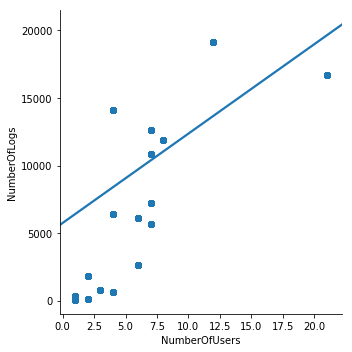

In [28]:
plot1 = sns.lmplot(x="NumberOfUsers", y="NumberOfLogs", data=datausers)

text = """
There appears to be very little correlation between logging frequency and nuber of users logging. 
"""
print (text)

I will explore this hypotesis in comparing how many users are on the location to logs taken over period of 10 months and logs during different seasons:

/Users/Mojca/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/Mojca/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/Mojca/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/Mojca/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnin

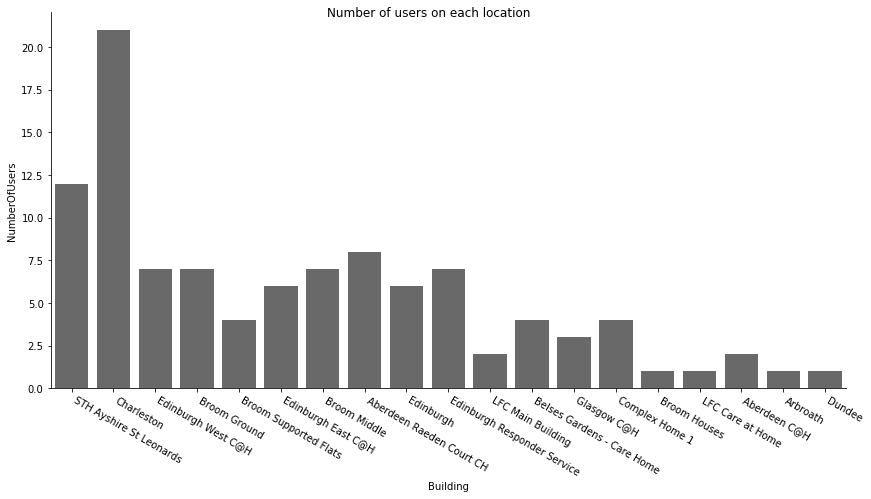

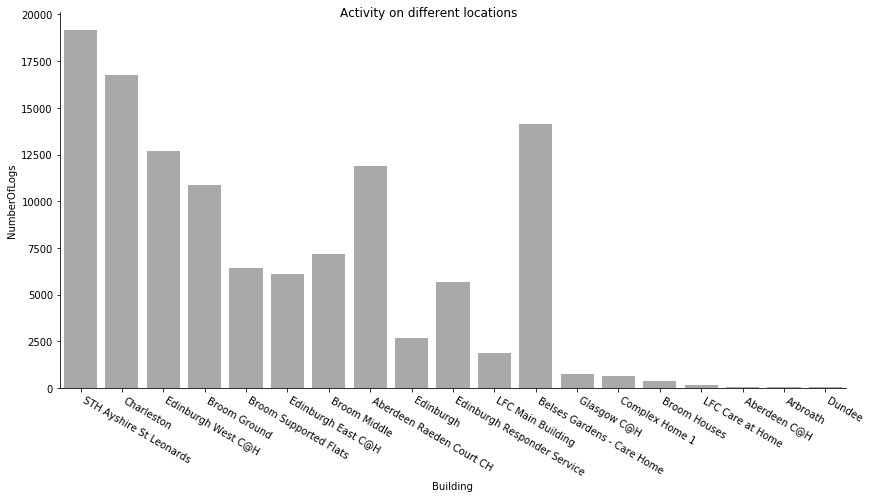

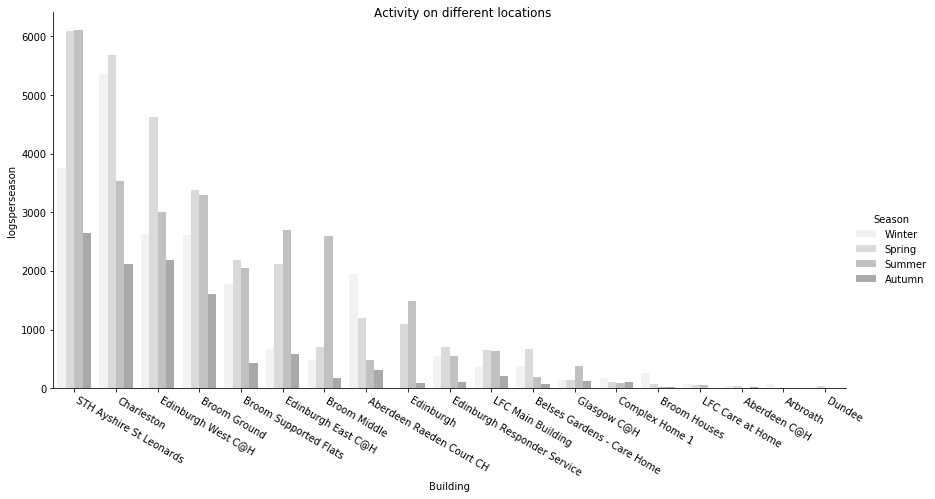

In [29]:
def UsersInBuilding():
    plot = sns.catplot(x='Building', y='NumberOfUsers', kind='bar', color="dimgray", data=datausers, size=6, aspect=2, order=datausers['Building'].value_counts().index)
    plt.xticks(rotation=-30, ha='left')
    plot.fig.suptitle('Number of users on each location')
    return plot

def FrequencyUsers():
    plot = sns.catplot(x='Building', y='NumberOfLogs', kind='bar', color="darkgray", data=datausers, size=6, aspect=2, order=datausers['Building'].value_counts().index)
    plt.xticks(rotation=-30, ha='left')
    plot.fig.suptitle('Activity on different locations')
    return plot


def SeasonLogs():
    plot = sns.catplot(x='Building', y='logsperseason', hue='Season', kind='bar', color="darkgray", data=LogsInSeason, size=6, aspect=2, order=datausers['Building'].value_counts().index)
    plt.xticks(rotation=-30, ha='left')
    plot.fig.suptitle('Activity on different locations')
    return plot

UsersInBuilding()
FrequencyUsers()
SeasonLogs()

From the graphs I can see that location with the most users produced less logs than location with half as much active users. That probably means that some users are more active than others. 

From the third graph I can conclude, that people are more active in spring and summer, but we have to take in account that winter and autumn logs were monitored for half the period of spring and summer logs. 


This plot shows activity during the year and confirms my previous assumption, that activity is lower in Winter and in Autumn.  



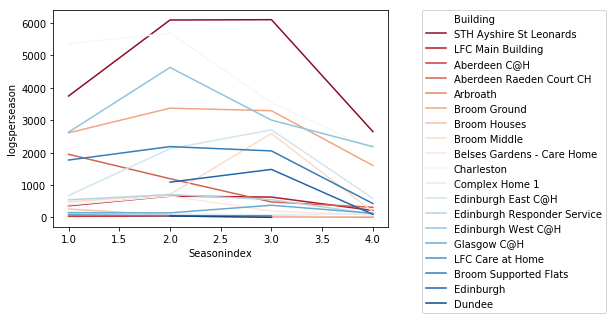

In [30]:
sns.lineplot(x="Seasonindex", y="logsperseason",
             hue='Building', palette= 'RdBu',
           data=LogsInSeason);
plt.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.)

text = """
This plot shows activity during the year and confirms my previous assumption, that activity is lower in Winter and in Autumn.  
"""
print (text)


More detailed comparison of activity during season on a different location:

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

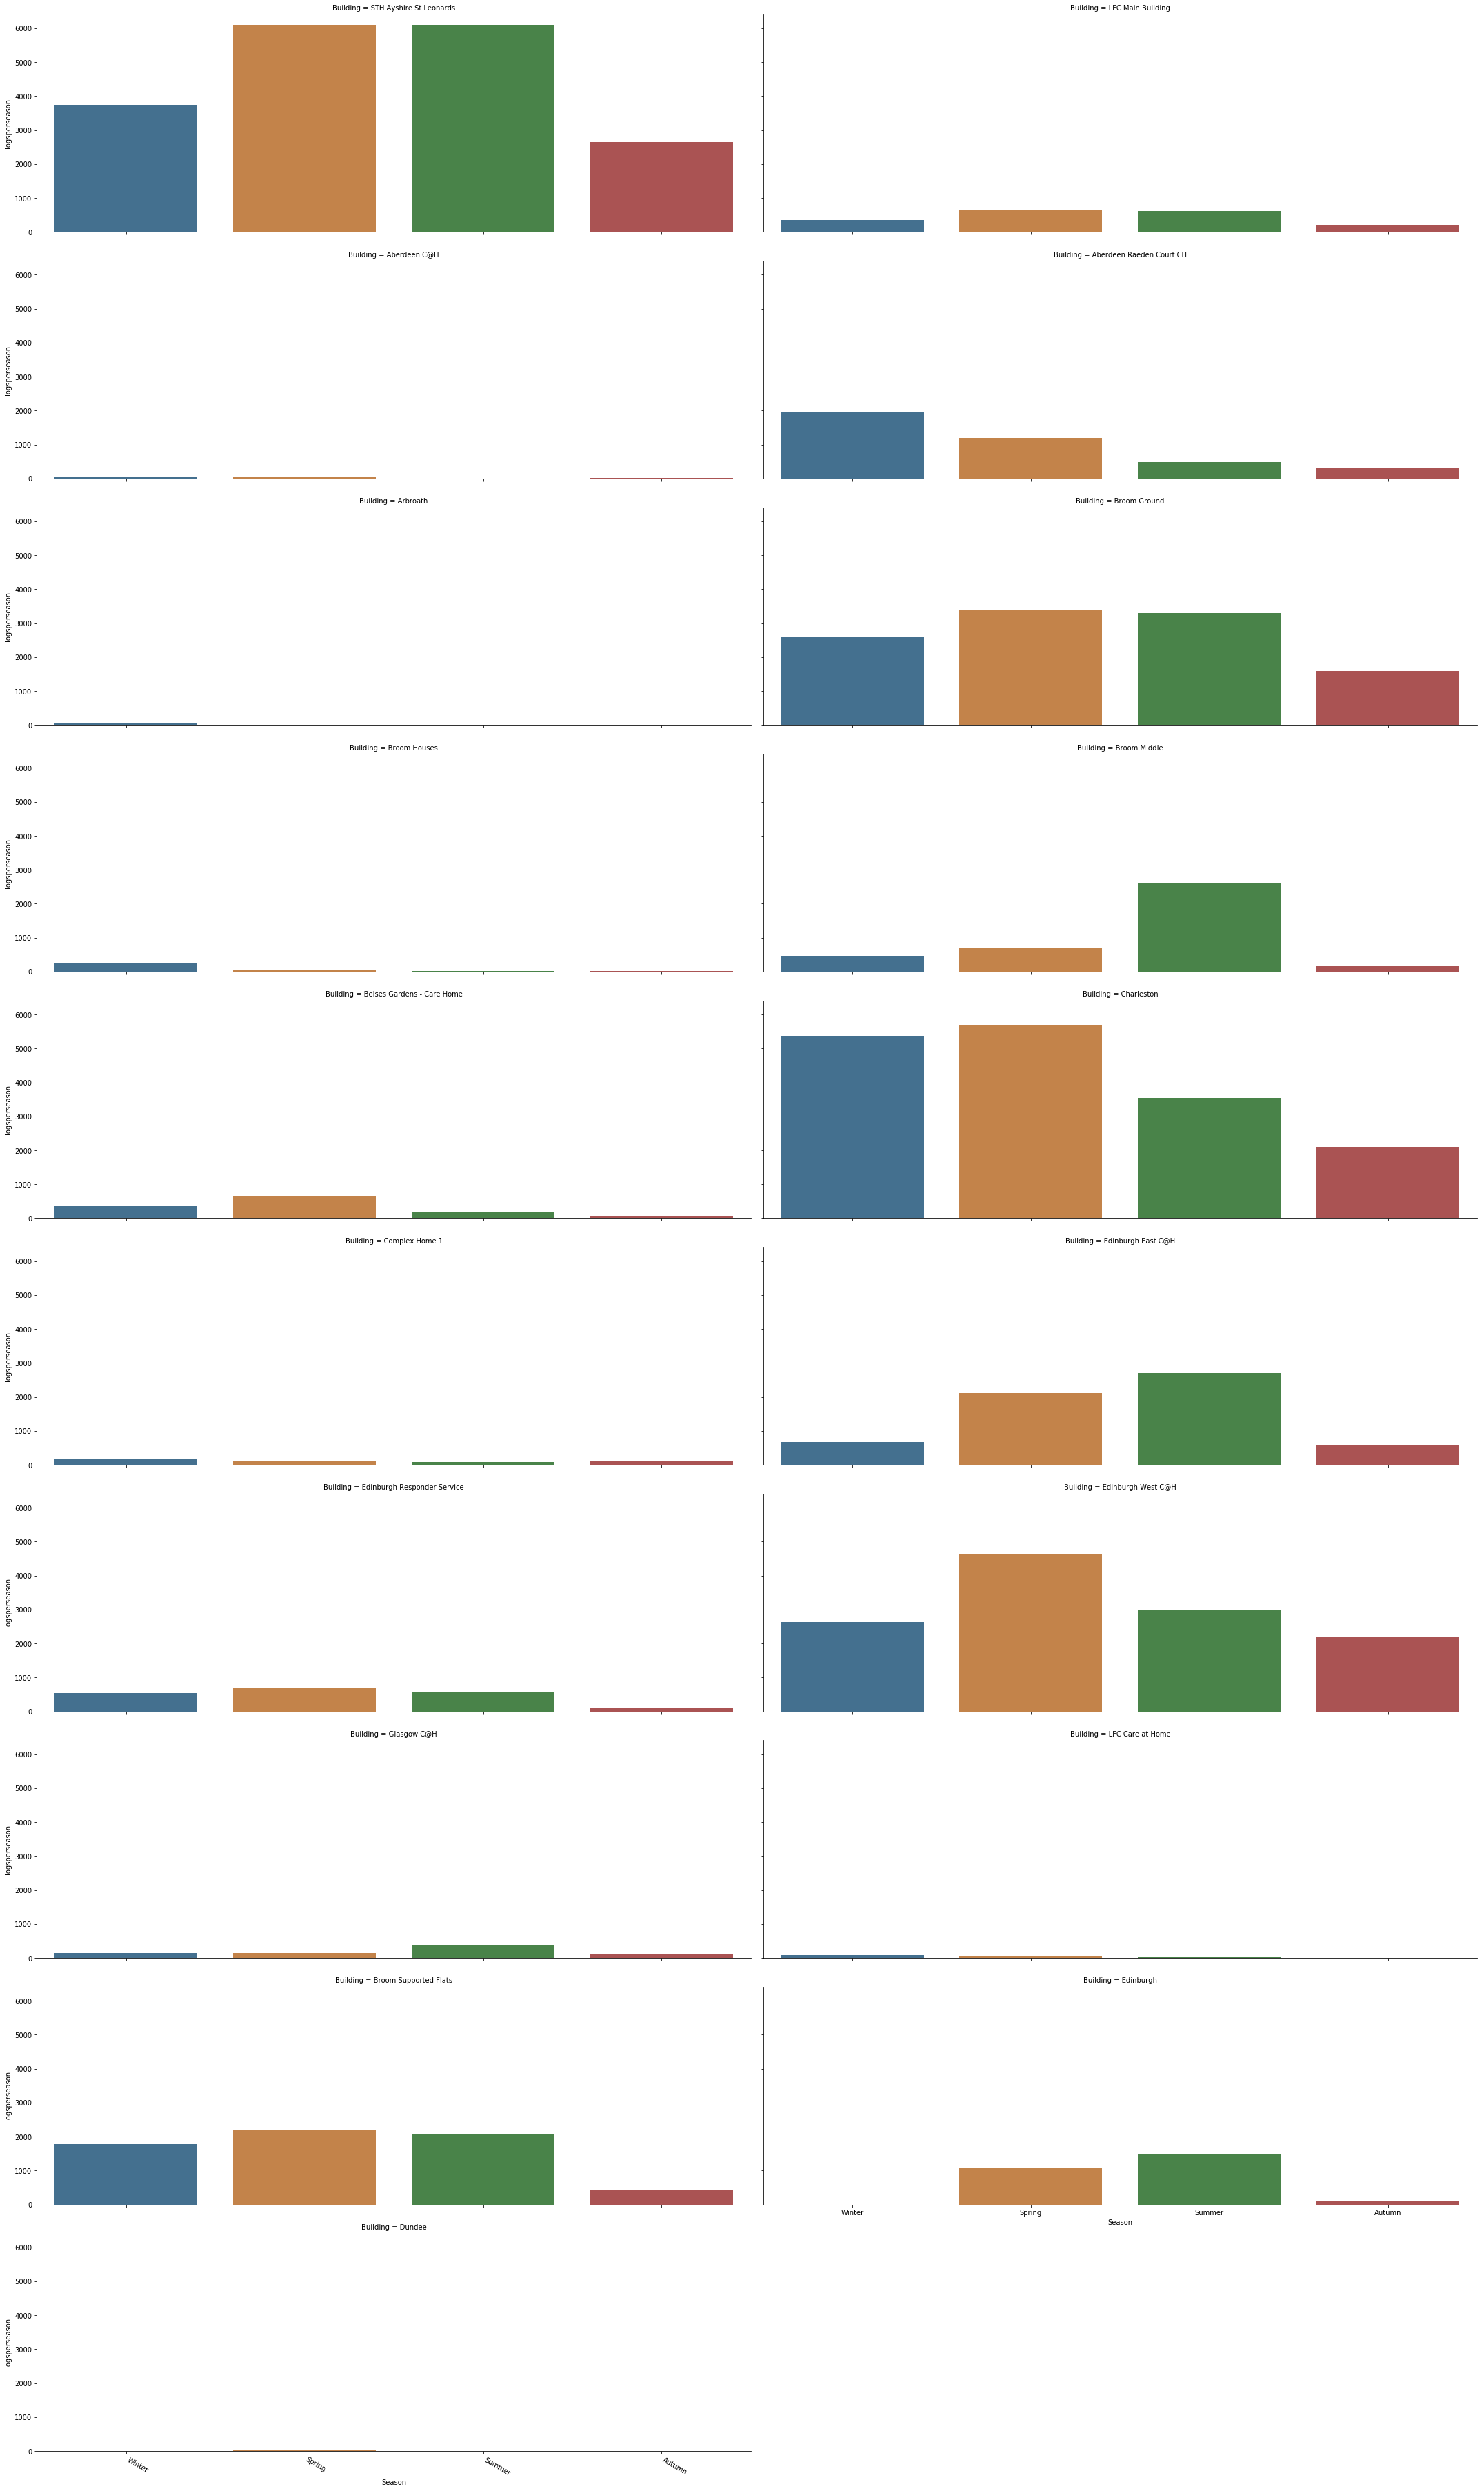

In [31]:
sns.catplot(x="Season", y="logsperseason", col="Building", col_wrap=2,
            data=LogsInSeason, saturation=.5,
            kind="bar", ci=None, aspect=3,)
plt.xticks(rotation=-30, ha='left')

### Reflection and Hypothesis

##### We would get better idea of trends by season with full year overview
From the plots we can read that users interact with system more in Spring and Summer. Since we are missing two months of logs; November for Autumn and December for Winter, I asume that this conclusion is not acurate. We should do a comparison again, when we have full dataset for a years time. 

##### A lot of locations and small number of users
We have 22 locations and only under 100 users unevenly distributed between them. I think that data analysis would bring different and more accurate results with bigger groups of people on a larger area. I assume that there would be different patterns in different parts of the Country. 
Since there are only names of "Buildings" in this dataset, we could ask the data hosts for location od those buildings. We could group them by area and get larger groups of users living in similar environments. 

##### Other factors
Once locations would be grouped in larger scale, it would be interesting to explore some further to look for patterns. Is usage different based only on location or does the demography of the users play a role? If the ages and sexes of the users are evenly distributed on all of the larger areas, than the location plays bigger role in different patterns. 
